In [59]:
!pip install numpy
!pip install pandas
!pip install sklearn
!pip install matplotlib
!pip install tabulate
!pip install seaborn
!pip install graphviz

In [60]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder as SklearnOneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
import datetime
from datetime import date
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score
from datetime import timedelta, date
from sklearn.metrics import mean_squared_error
import sklearn
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz 
from matplotlib import pyplot as plt
from sklearn import tree
import zipfile
import seaborn as sns
import os
import gc
gc.collect()

25397

In [61]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


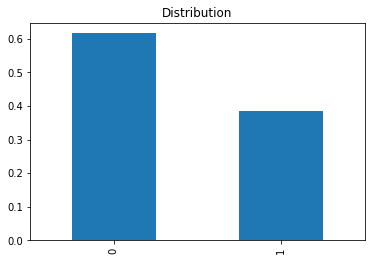

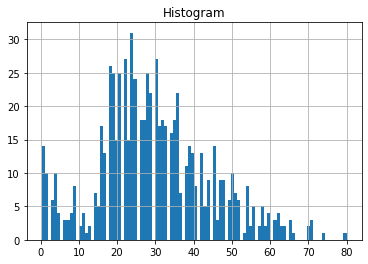

In [62]:
train_df.info()

train_df.Survived.value_counts()
train_df.Survived.value_counts(normalize=True)
#distribution plot
train_df.Survived.value_counts(normalize=True).plot(kind="bar")
plt.title("Distribution")
plt.show()

train_df['Age'].hist(bins=100)
plt.title("Histogram")
plt.show()

In [63]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


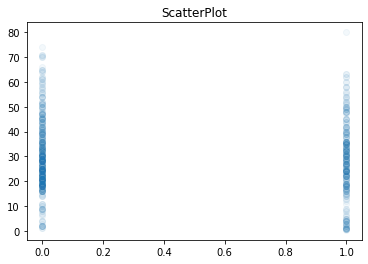

In [64]:
plt.scatter(train_df.Survived,train_df.Age,alpha=0.05)
plt.title("ScatterPlot")
plt.show()

male      0.616162
female    0.383838
Name: Sex, dtype: float64


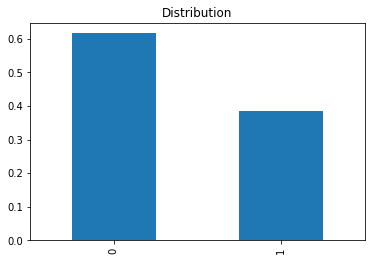

In [65]:
print(train_df.Sex[train_df.Survived].value_counts(normalize=True))
train_df.Survived.value_counts(normalize=True).plot(kind="bar")
plt.title("Distribution")
plt.show()

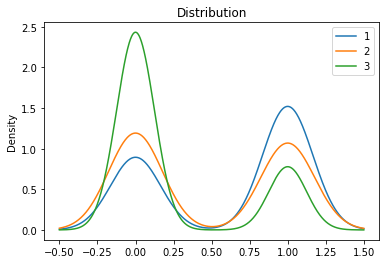

In [66]:
for x in [1,2,3]:
    train_df.Survived[train_df.Pclass==x].plot(kind="kde")
plt.title("Distribution")
plt.legend(("1","2","3"))
plt.show()


Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64


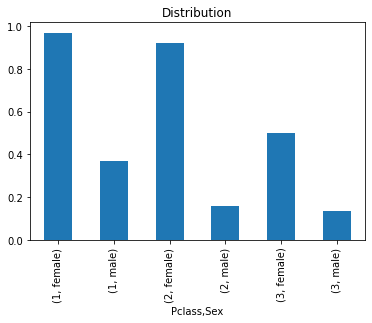

In [67]:
print(train_df.groupby(['Pclass','Sex']).Survived.mean())
train_df.groupby(['Pclass','Sex']).Survived.mean().plot(kind="bar")
plt.title("Distribution")
plt.show()

In [68]:
train_df.Sex = train_df.Sex.map({"male":0,"female":1})
train_df.info()
train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [69]:
train_df['Hyp']=0
train_df.loc[train_df.Sex==1,"Hyp"]=1
train_df['Result']=0
train_df.loc[train_df.Survived==train_df.Hyp,"Result"]=1
train_df.head()
train_df.Result.value_counts(normalize=True)

1    0.786756
0    0.213244
Name: Result, dtype: float64

In [70]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].dropna().median())
train_df.info()
train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Hyp          891 non-null    int64  
 13  Result       891 non-null    int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 97.6+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Hyp,Result
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0,1


In [71]:
training_feature_names = ['Pclass','Age','Fare','Sex','SibSp','Parch']
training_target = train_df['Survived'].values
training_features = train_df[training_feature_names].values
training_features

array([[ 3.    , 22.    ,  7.25  ,  0.    ,  1.    ,  0.    ],
       [ 1.    , 38.    , 71.2833,  1.    ,  1.    ,  0.    ],
       [ 3.    , 26.    ,  7.925 ,  1.    ,  0.    ,  0.    ],
       ...,
       [ 3.    , 28.    , 23.45  ,  1.    ,  1.    ,  2.    ],
       [ 1.    , 26.    , 30.    ,  0.    ,  0.    ,  0.    ],
       [ 3.    , 32.    ,  7.75  ,  0.    ,  0.    ,  0.    ]])

In [74]:
from sklearn import linear_model
MLalgo = linear_model.LogisticRegression()
MLmodel = MLalgo.fit(training_features,training_target)
print("Linear Model score:",MLalgo.score(training_features,training_target))

Linear Model score: 0.7957351290684624


In [88]:
from sklearn import model_selection,preprocessing,tree,svm
scores = model_selection.cross_val_score(MLalgo,training_features,training_target, scoring="accuracy",cv=50)
scores.mean()

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mod

0.7936601307189542

In [84]:
poly = preprocessing.PolynomialFeatures(degree=2)
poly_features = poly.fit_transform(training_features)
MLmodel = MLalgo.fit(poly_features,training_target)
scores_poly = model_selection.cross_val_score(MLalgo,poly_features,training_target, scoring="accuracy",cv=50)
print("Poly Model score:",MLmodel.score(poly_features,training_target))
scores_poly.mean()

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mod

Poly Model score: 0.8035914702581369


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.7937254901960783

In [87]:
MLAgo = tree.DecisionTreeClassifier(random_state=1)
MLModel = MLAgo.fit(training_features,training_target)
print("DT Model score:",MLAgo.score(training_features,training_target))
scores = model_selection.cross_val_score(MLAgo,training_features,training_target, scoring="accuracy",cv=50)
scores.mean()

DT Model score: 0.9797979797979798


0.7859477124183006

In [89]:
MLAgo = tree.DecisionTreeClassifier(random_state=1,max_depth=3)
MLModel = MLAgo.fit(training_features,training_target)
print("DT Model score:",MLAgo.score(training_features,training_target))
scores = model_selection.cross_val_score(MLAgo,training_features,training_target, scoring="accuracy",cv=50)
scores.mean()

DT Model score: 0.8271604938271605


0.818627450980392